## Project Objectives

The primary objective of predicting client subscriptions to term deposits.
create random forest, logistic regression and decision tree.
Hint: The least accuracy should be 80% for all models.
Try to arrange your work well. follow this process
1. include introduction paragraph in the work (this is normally done after analysis)
2. Import packages (this helps you to stop importing packages throughout your work which leads to repetition of other packages. even if you need a package later on, make sure it is included in this chunk)
3. import data
4. Data preprocessing (based on what you want to look at there are different methods of dealing with this step. Ensure you explain every step with a paragraph for example, if the data has missing values, explain why you need to remove/fill them, explain also how you deal with outliers in the way you chose to deal with them... and so on. basically explain your work as you keep doing it. it improves credibility)
4. EDA (make plots of the most important variables in your data, explain them in a paragraph)
5. Modeling (be careful here, ensure your data is in the right format. ALWAYS CHECK ON YOU Y-VARIABLE, you might want to standardize/normalize/perform one-hot encoding. these are not necessary though depending on your data)
6. Model evaluation (check on the accuracy, compare the models, produce classification reports, ROC curve and explain it, and feature importance for some models), feature importance helps you determine the most important variables per model
7. Recommend the best model and why
8. Conclude your work.

## Introduction
The primary objective of this project is to predict client subscriptions to term deposits, leveraging machine learning algorithms such as Random Forest, Logistic Regression, and Decision Tree. Term deposit subscriptions are vital for financial institutions as they contribute to stable funding and revenue generation. By accurately predicting client subscriptions, banks can optimize their marketing strategies, allocate resources efficiently, and enhance customer satisfaction.

In this project, we will explore a dataset containing various client attributes such as age, job, marital status, education, and economic indicators, along with whether they subscribed to a term deposit or not. The dataset will undergo thorough preprocessing to handle missing values, outliers, and categorical variables. Exploratory Data Analysis (EDA) will provide insights into the distribution and correlation of variables, guiding feature selection and model building.

Three machine learning algorithms, namely Random Forest, Logistic Regression, and Decision Tree, will be employed to build predictive models. The models will be trained on a portion of the dataset and evaluated on unseen data to assess their performance. Evaluation metrics such as accuracy, classification reports, and ROC curves will be utilized to compare the models and identify the most effective one.

Additionally, feature importance analysis will be conducted, particularly for the Random Forest model, to determine the significant variables influencing term deposit subscriptions. The findings of this analysis will provide valuable insights for financial institutions to prioritize their marketing efforts and tailor their services to potential clients effectively.

Ultimately, the recommended model will be selected based on its performance and interpretability, providing actionable recommendations for financial institutions to enhance term deposit subscription rates. This project serves as a demonstration of leveraging machine learning techniques to address real-world challenges in the banking sector, with implications for customer acquisition, retention, and revenue optimization.

In [ ]:
# Import packages
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

## Data Importation

In [ ]:
# import data
train = pd.read_csv("/content/drive/MyDrive/trainset.csv")
test = pd.read_csv("/content/drive/MyDrive/trainset.csv")

In [ ]:
# Lets display the first rows for each set
train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


In [ ]:
test.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


## Data Preprocessing
We will first explore the basic structure of the data
Handle missing values and outlier in the dataset.

### 1.0 Basic Structure

In [ ]:
train.shape

(29271, 15)

In [ ]:
# Shape of the data
test.shape

(29271, 15)

Both train and test data have 29271 observations and 15 variables

In [ ]:
# Let's check the information of the various variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


From obesrvation, we can see that the data does not contain missing values. We will inspect further to be sure of this. Most of the variables types are int,object and float datatype.
Next let's investigate the education column a nd get its unique values
The Subscribe variable is an object datatype but it represents a binary outcome
It is important to note that both our train and test data have the same shape, observations and number of variables.

In [ ]:
train['marital'].unique()

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [ ]:
train['education'].unique()

array(['basic.4y', 'university.degree', 'basic.9y', 'professional.course',
       'unknown', 'high.school', 'basic.6y', 'illiterate'], dtype=object)

In [ ]:
train['Subscribed'].unique()

array(['yes', 'no'], dtype=object)

We can see the basic is devided in 4years,basic 9years and 6years

Lets proceed and look at summary of the data

In [ ]:
train.describe()

,age,duration,campaign,pdays,nr.employed
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,40.126132,266.334973,2.737556,988.235455,5205.364012
std,9.522742,272.826726,3.085469,102.879851,36.306531
min,17.000000,0.000000,1.000000,0.000000,5017.500000
25%,32.000000,103.000000,1.000000,999.000000,5191.000000
50%,39.000000,179.000000,2.000000,999.000000,5228.100000
75%,47.000000,327.000000,3.000000,999.000000,5228.100000
max,88.000000,4918.000000,56.000000,999.000000,5228.100000


In [ ]:
test.describe()

,age,duration,campaign,pdays,nr.employed
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,40.126132,266.334973,2.737556,988.235455,5205.364012
std,9.522742,272.826726,3.085469,102.879851,36.306531
min,17.000000,0.000000,1.000000,0.000000,5017.500000
25%,32.000000,103.000000,1.000000,999.000000,5191.000000
50%,39.000000,179.000000,2.000000,999.000000,5228.100000
75%,47.000000,327.000000,3.000000,999.000000,5228.100000
max,88.000000,4918.000000,56.000000,999.000000,5228.100000


The following observations apply for both train and test data

1. The average age of client subscriptions is 30, with a minimum of 17 and a
maximum of 88

2. Duration: The average duration of the campaign is about 266 days, with a standard deviation of approximately 272.82. The shortest campaign lasted 0 days, while the longest campaign lasted 4918 days.
3. Campaign: On average, each individual was part of around 2.74 campaigns. The minimum number of campaigns for an individual is 1, and the maximum number is 56.
4. Pdays: The average number of days since the previous campaign contact (pdays) is approximately 988.24, with a standard deviation of around 102.88. The minimum value for pdays is 0, indicating that some individuals were contacted on the same day as their previous campaign contact.
5. Nr.employed: The average number of employees at the time of contact is approximately 5205.36, with a standard deviation of about 36.31. The number of employees ranges from a minimum of 5017.5 to a maximum of 5228.1.

### 1.2 Checking for missing values


Missing values:
 age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64


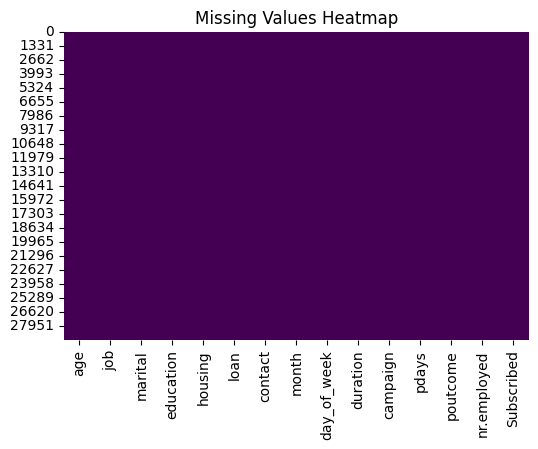

In [ ]:
missing_values = train.isnull().sum()
print("Missing values:\n", missing_values)

# Plot missing values
plt.figure(figsize=(6, 4))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Missing values:
 age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64


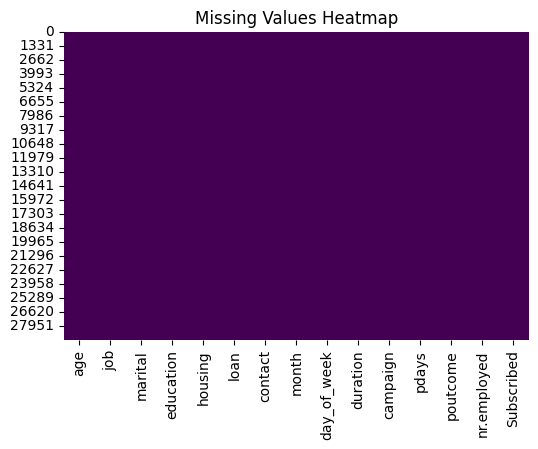

In [ ]:
missing_values = test.isnull().sum()
print("Missing values:\n", missing_values)

# Plot missing values
plt.figure(figsize=(6, 4))
sns.heatmap(test.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

The are no missing values in both the train and test dataset. This is the reason why the heatmap is empty and clear. From the above we have ascertained our hypothesis from the dataframes info that there are no missing values.

### 1.3 Check for duplicates in both datasets

In [ ]:
# Check for duplicate values
duplicates_train = train[train.duplicated()]

In [ ]:
duplicates_train

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
2701,45,admin.,married,university.degree,no,no,cellular,jul,thu,252,1,999,nonexistent,5076.2,yes
4437,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,nonexistent,5191.0,no
8693,56,blue-collar,married,basic.4y,no,no,telephone,may,mon,136,1,999,nonexistent,5191.0,no
15026,36,retired,married,unknown,no,no,telephone,jul,thu,88,1,999,nonexistent,5228.1,no
16884,27,technician,single,professional.course,no,no,cellular,jul,mon,331,2,999,nonexistent,5228.1,no
19418,47,technician,divorced,high.school,yes,no,cellular,jul,thu,43,3,999,nonexistent,5228.1,no
20836,32,technician,single,professional.course,yes,no,cellular,jul,thu,128,1,999,nonexistent,5228.1,no
21914,33,admin.,married,university.degree,yes,no,cellular,aug,thu,59,1,999,nonexistent,5228.1,no
22486,55,services,married,high.school,no,no,cellular,aug,mon,33,1,999,nonexistent,5228.1,no
22776,41,technician,married,professional.course,yes,no,cellular,aug,tue,127,1,999,nonexistent,5228.1,no


In [ ]:
duplicates_test = test[test.duplicated()]
duplicates_test

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
2701,45,admin.,married,university.degree,no,no,cellular,jul,thu,252,1,999,nonexistent,5076.2,yes
4437,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,nonexistent,5191.0,no
8693,56,blue-collar,married,basic.4y,no,no,telephone,may,mon,136,1,999,nonexistent,5191.0,no
15026,36,retired,married,unknown,no,no,telephone,jul,thu,88,1,999,nonexistent,5228.1,no
16884,27,technician,single,professional.course,no,no,cellular,jul,mon,331,2,999,nonexistent,5228.1,no
19418,47,technician,divorced,high.school,yes,no,cellular,jul,thu,43,3,999,nonexistent,5228.1,no
20836,32,technician,single,professional.course,yes,no,cellular,jul,thu,128,1,999,nonexistent,5228.1,no
21914,33,admin.,married,university.degree,yes,no,cellular,aug,thu,59,1,999,nonexistent,5228.1,no
22486,55,services,married,high.school,no,no,cellular,aug,mon,33,1,999,nonexistent,5228.1,no
22776,41,technician,married,professional.course,yes,no,cellular,aug,tue,127,1,999,nonexistent,5228.1,no


We have 11 observations which are duplicates. we will drop the from datasets

In [ ]:
# Drop duplicates in the train dataset
train.drop_duplicates(inplace=True)
train.reset_index(drop=True, inplace=True)

In [ ]:
# Drop duplicates in the test dataset
test.drop_duplicates(inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
# Confirm whether they have been dropped
print(train[train.duplicated()])

Empty DataFrame
Columns: [age, job, marital, education, housing, loan, contact, month, day_of_week, duration, campaign, pdays, poutcome, nr.employed, Subscribed]
Index: []


In [ ]:
print(test[test.duplicated()])

Empty DataFrame
Columns: [age, job, marital, education, housing, loan, contact, month, day_of_week, duration, campaign, pdays, poutcome, nr.employed, Subscribed]
Index: []


## Exploring data using Visualization

Since we have two datasets, we will explore the train set and test set respectively. To make it easier, we will create a function to perform eda

### Train set

In [37]:
def eda_train(train):
  """
  Perfomr exploratory data analysis (EDA) on the train dataset.

  Args:
  - train (DataFrame): Train dataset

  Returns:
  - None
  """

  # Summary statisitcs
  print("Train Data Summary Statisitcs:")
  print(train.describe())
  print("\n")

  # Differentiate Categorical and Numerical features

  # Categorical features
  cat_train = train.select_dtypes(include=['object'])
  print("Categorical Features:")
  print(cat_train.head())
  print("\n")

  # Numerical features
  numerical_features = [feature for feature in train.columns if  train[feature].dtypes != 'object']
  num_train = train[numerical_features]
  print("Numerical Features:")
  print(num_train.head())
  print("\n")


  # Separate Discrete and Continous features
  discrete_feature = [feature for feature in numerical_features if len(train[feature].unique()) < 25]
  continous_feature = [feature for feature in numerical_features if feature not in discrete_feature]

  print("Discrete Features:")
  print(discrete_feature)
  print("\n")

  print("Continuous Features:")
  print(continous_feature)
  print("\n")

  # Lets brake down to numerical continous features
  train_data_cont = num_train[continous_feature]
  print("Continous features that are numerical:")
  print(train_data_cont.head())
  print("\n")

  return cat_train, num_train, discrete_feature, continous_feature, train_data_cont

cat_train, num_train, discrete_feature, continuous_feature, train_data_cont = eda_train(train)


Train Data Summary Statisitcs:
                age      duration      campaign         pdays   nr.employed
count  29260.000000  29260.000000  29260.000000  29260.000000  29260.000000
mean      40.125837    266.385748      2.738072    988.231408   5205.364296
std        9.523000    272.860476      3.085909    102.898976     36.303563
min       17.000000      0.000000      1.000000      0.000000   5017.500000
25%       32.000000    103.000000      1.000000    999.000000   5191.000000
50%       39.000000    179.000000      2.000000    999.000000   5228.100000
75%       47.000000    327.000000      3.000000    999.000000   5228.100000
max       88.000000   4918.000000     56.000000    999.000000   5228.100000


Categorical Features:
            job   marital            education housing loan    contact month  \
0   blue-collar  divorced             basic.4y     yes   no  telephone   may   
1  entrepreneur   married    university.degree     yes   no  telephone   may   
2    technician   mar

We have 10 categorical features which include:job,marital, education,housing,loan, contact, month,day, poutcome, and our target variable subscribed.

We have 5 Numerical variables which include: age, duration, campaign, pdays, nr.employed.

Out of the 5 Numerical variable pdays and nr.employed are discrete while age, duration, campaign are continous. The same applies to test data

### Visualizing continous features in train data

#### Histogram

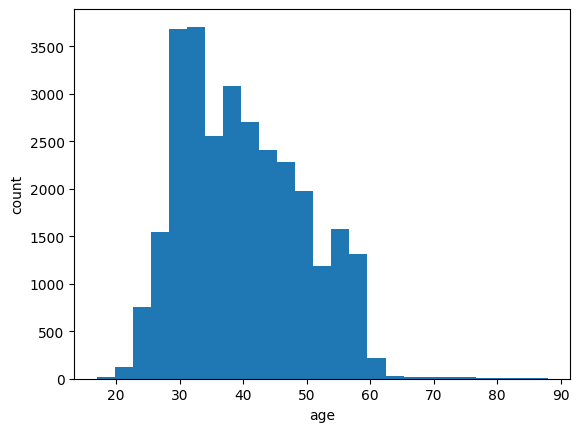

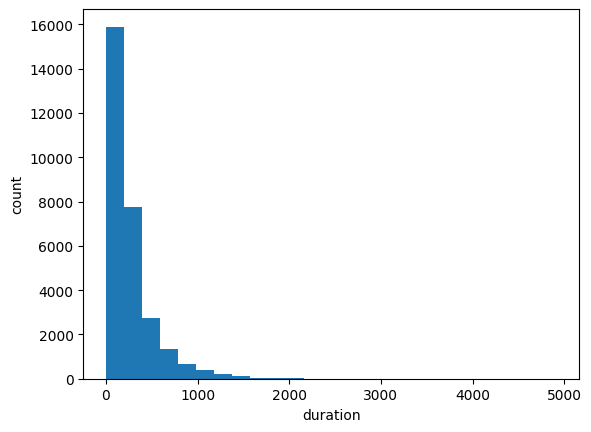

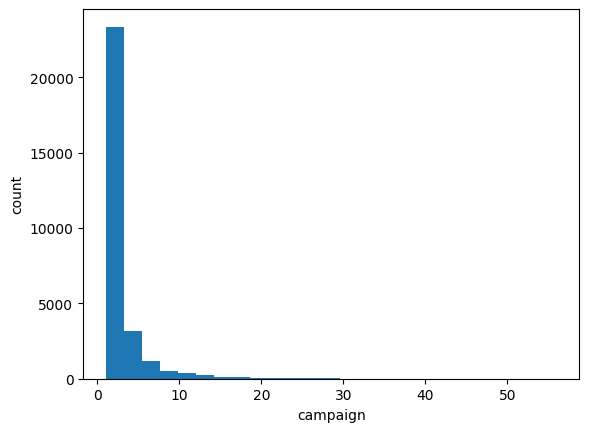

In [38]:
for feature in train_data_cont.columns:
  plt.figure()
  plt.hist(train_data_cont[feature], bins=25)
  plt.xlabel(feature)
  plt.ylabel("count")


#### Boxplot

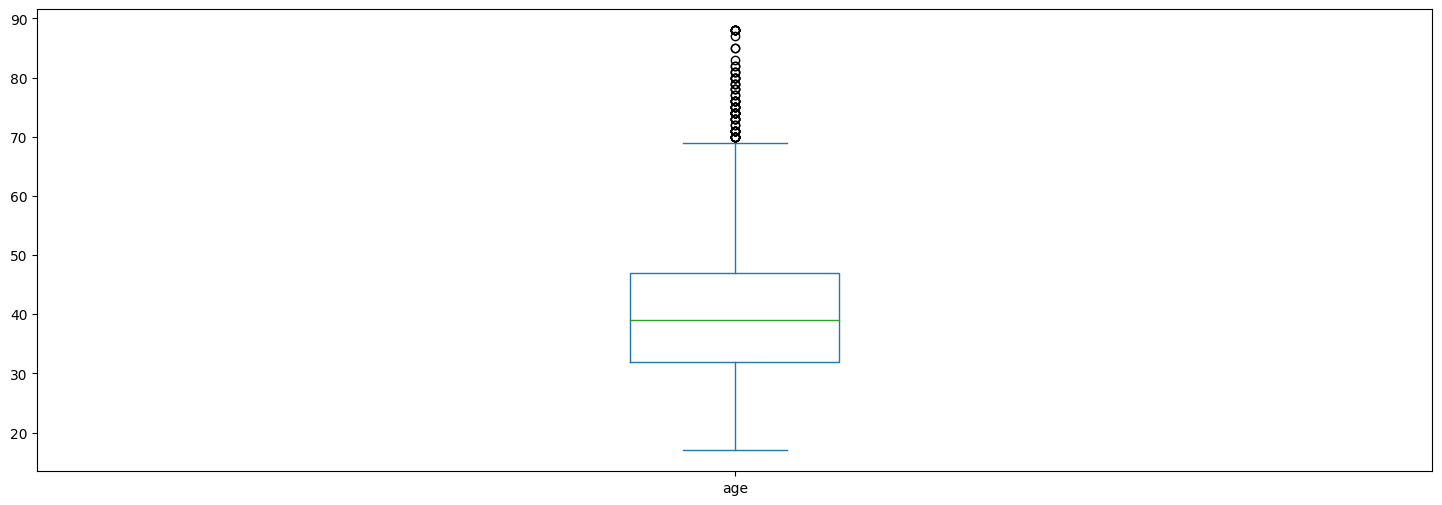

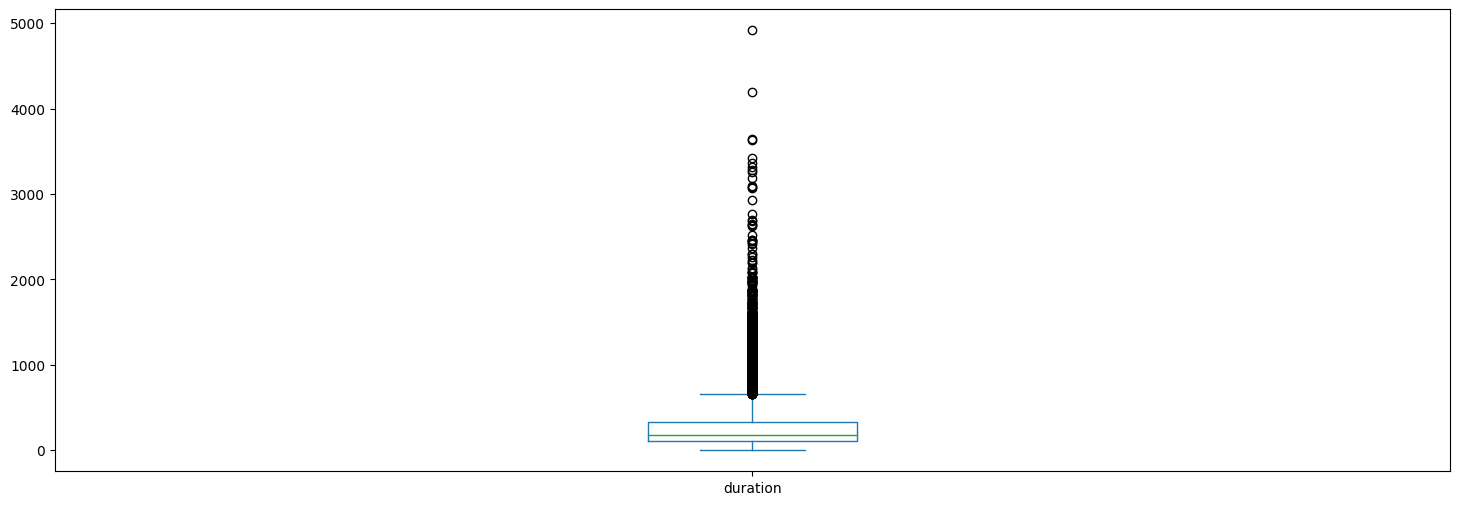

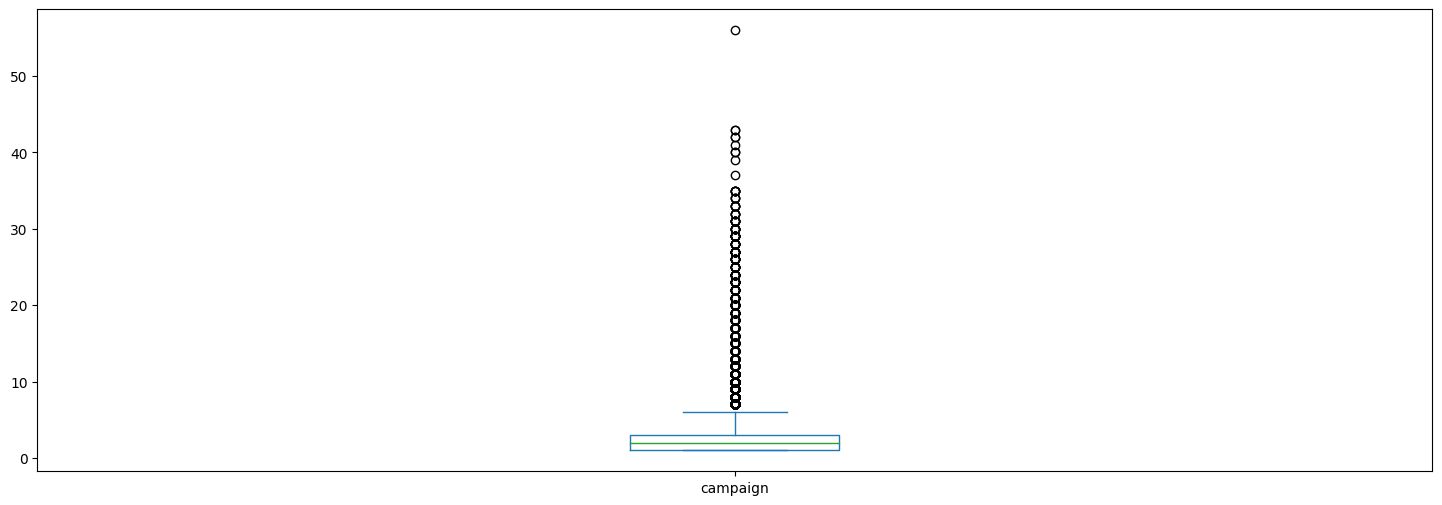

In [41]:
for feature in train_data_cont.columns:
    plt.figure(figsize=(18, 6))
    train_data_cont[feature].plot(kind='box')
    plt.show()


#### Correlation and Heat map

In [42]:
# Checking for Correlation between variables
train_data_cont.corr()

,age,duration,campaign
age,1.000000,-0.023437,0.011455
duration,-0.023437,1.000000,-0.074254
campaign,0.011455,-0.074254,1.000000


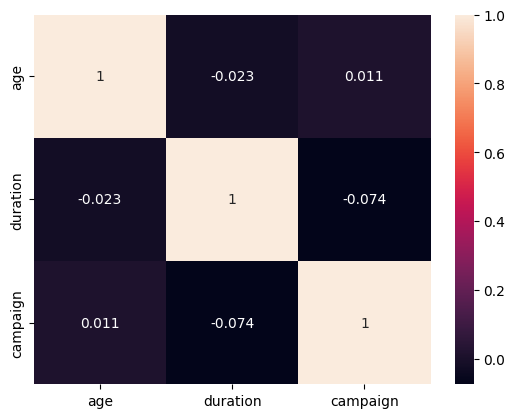

In [43]:
sns.heatmap(train_data_cont.corr(), annot=True)
plt.show()

### Visualizing Categorical features in the train set

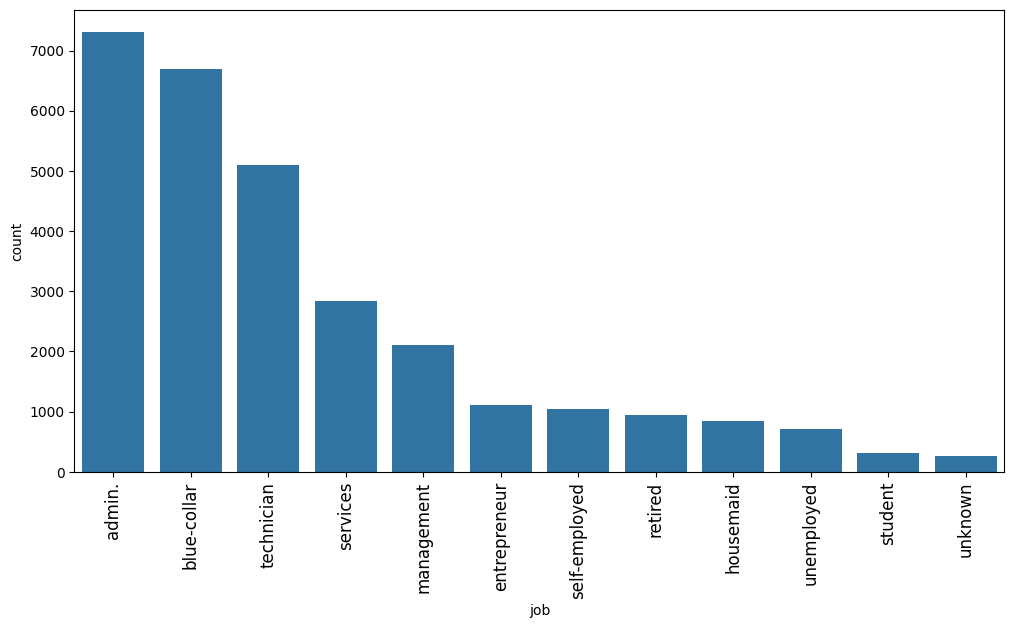

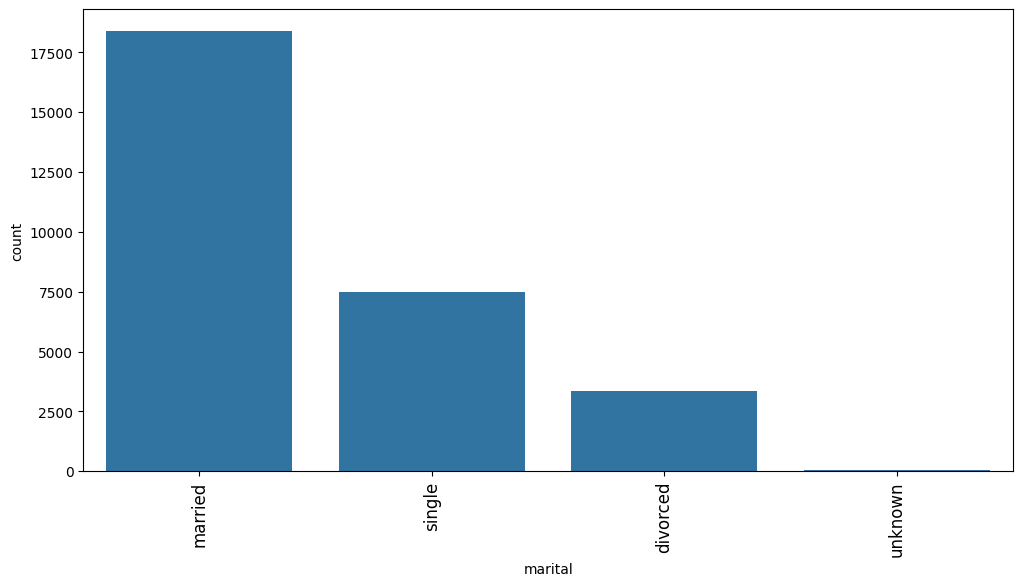

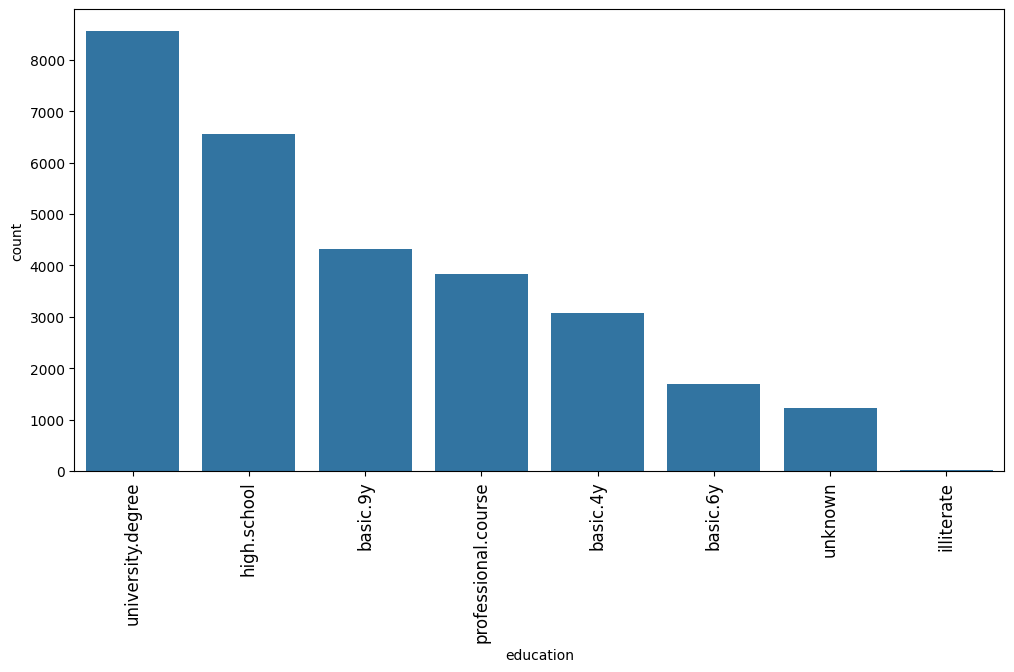

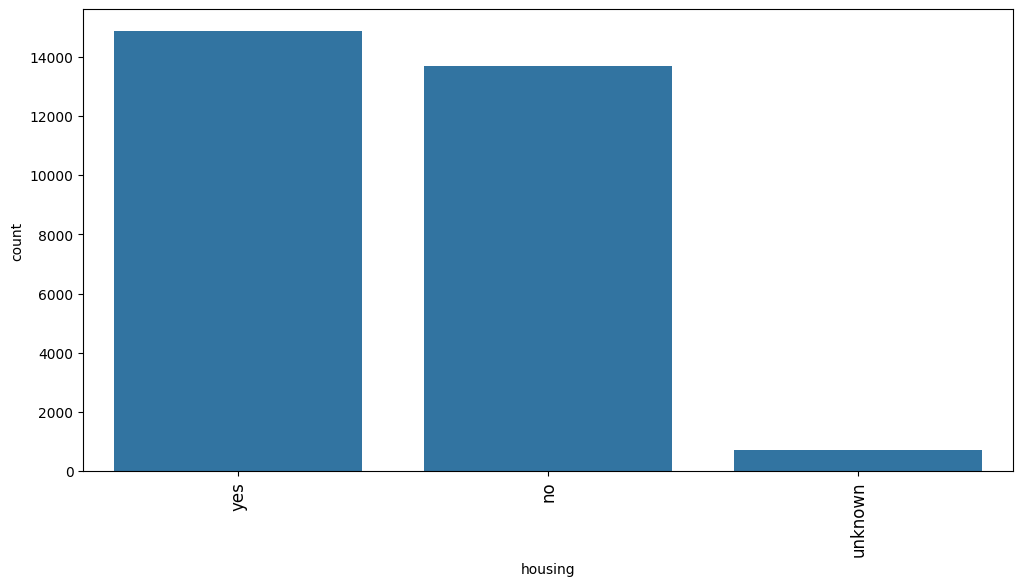

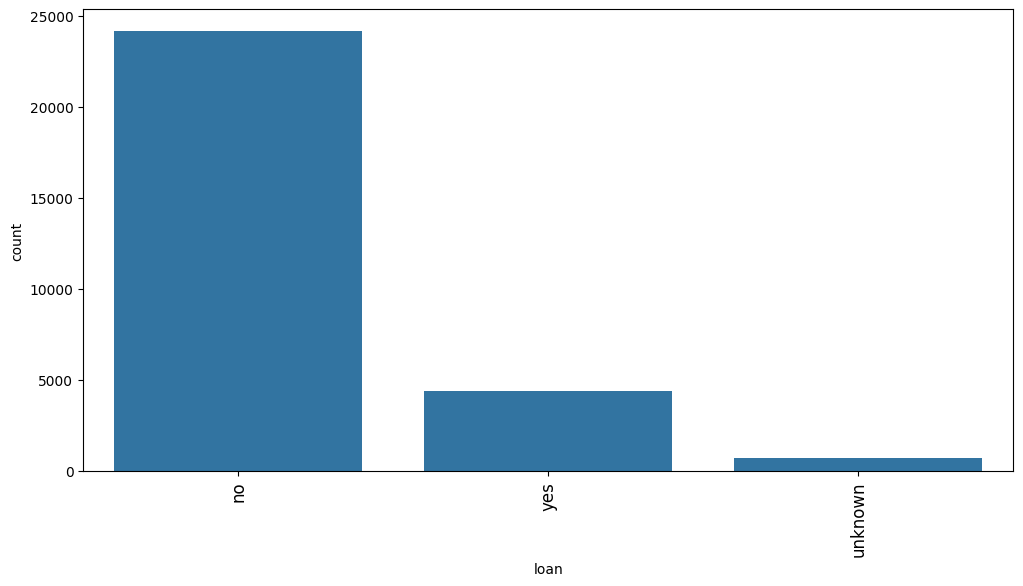

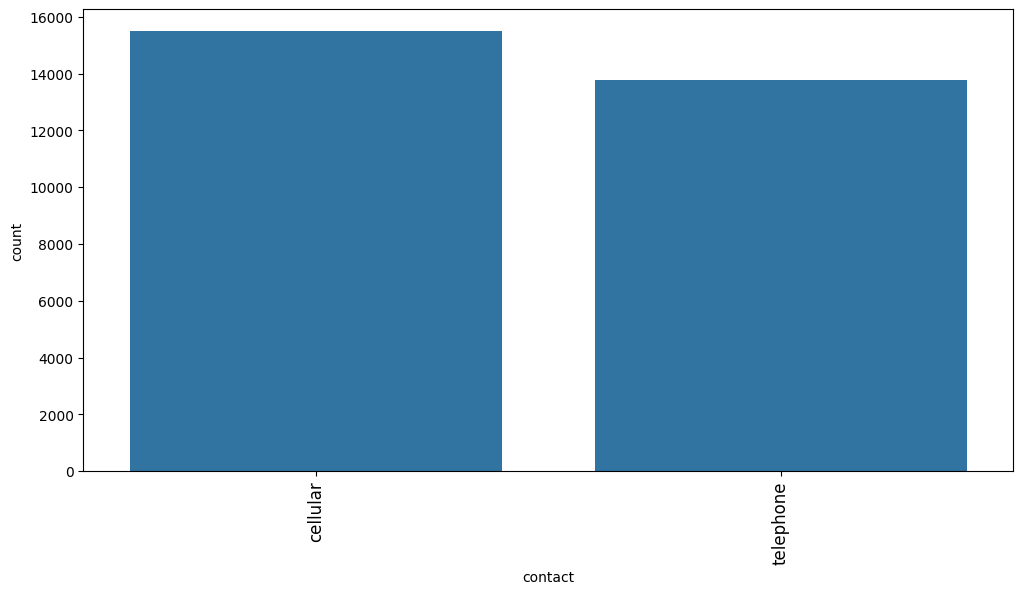

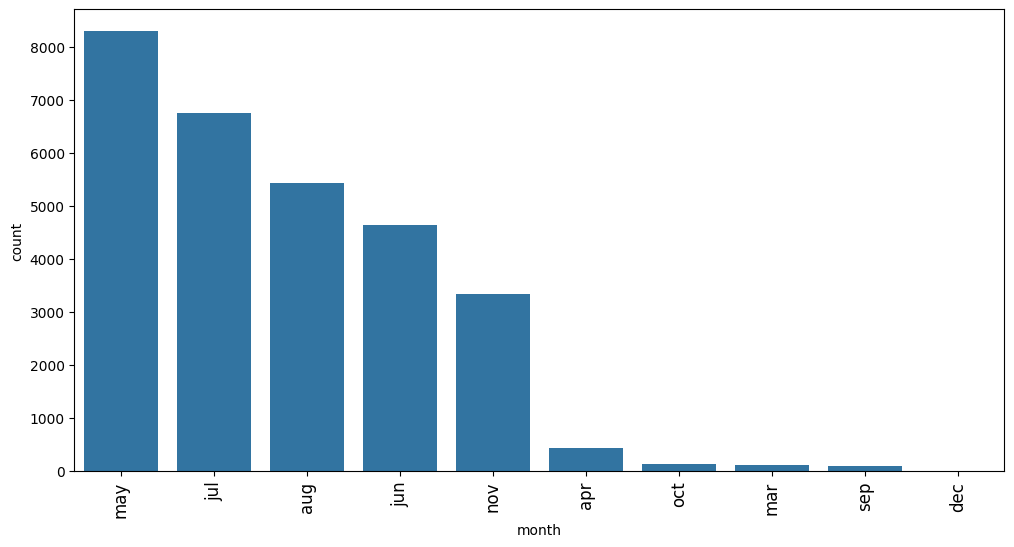

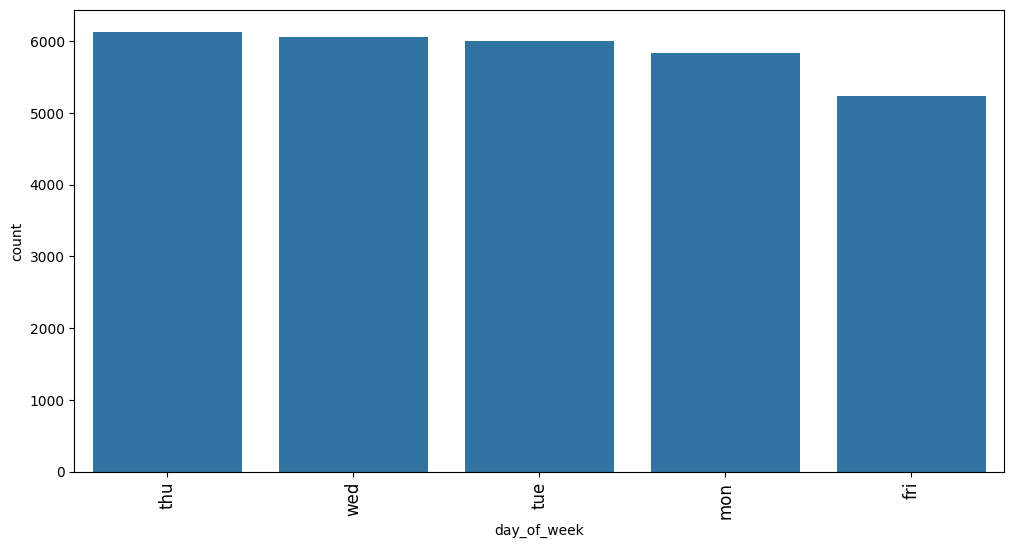

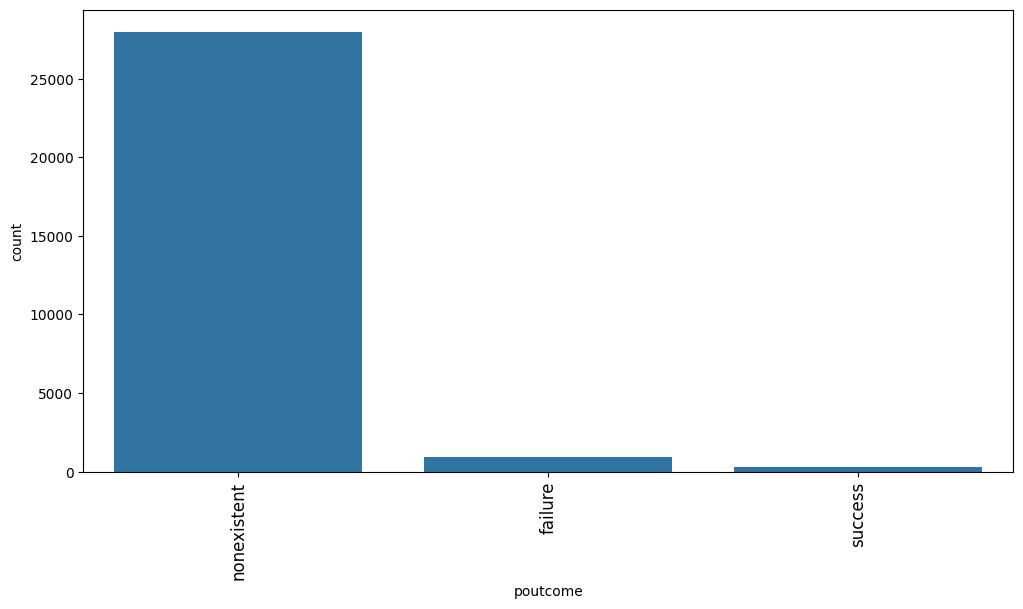

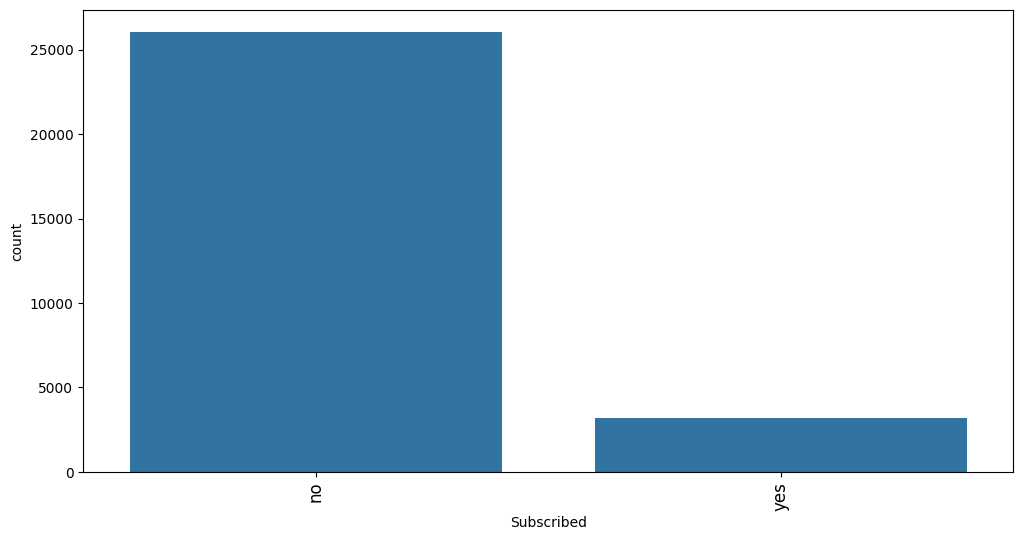

In [44]:
for i in cat_train.columns:
  plt.figure(figsize=(12,6))
  sns.countplot(x=i, data=cat_train,
                order=cat_train[i].value_counts().index)
  plt.xticks(rotation = 90, fontsize = 12)
plt.show()

In [45]:
import seaborn as sb

<Figure size 1200x600 with 0 Axes>

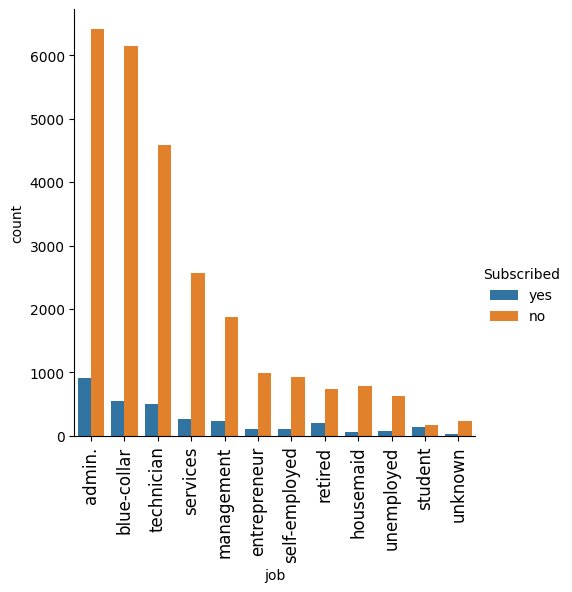

<Figure size 1200x600 with 0 Axes>

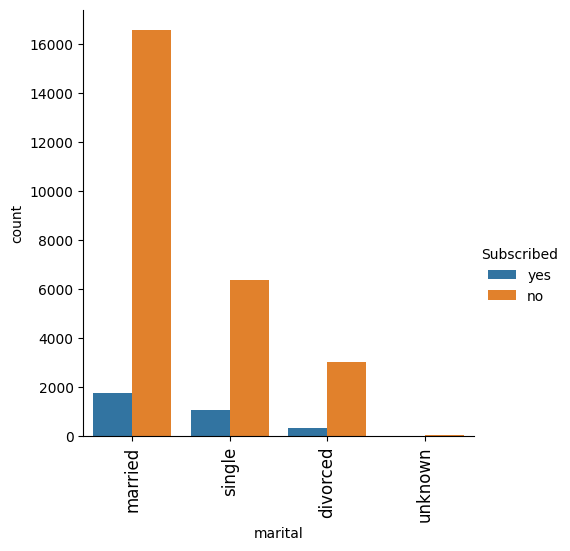

<Figure size 1200x600 with 0 Axes>

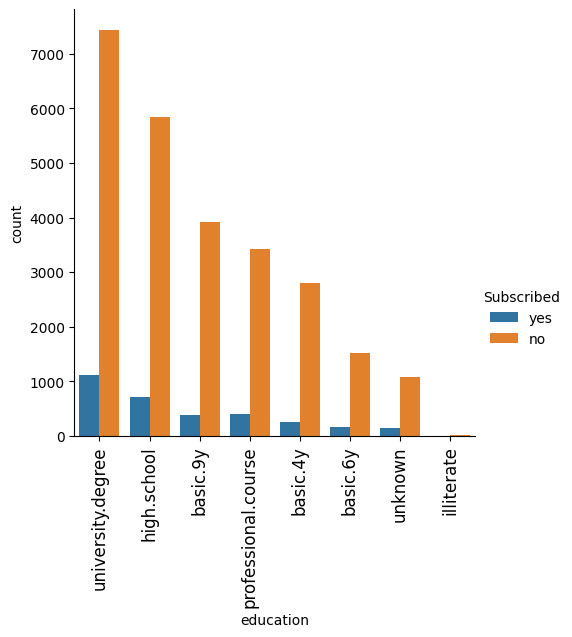

<Figure size 1200x600 with 0 Axes>

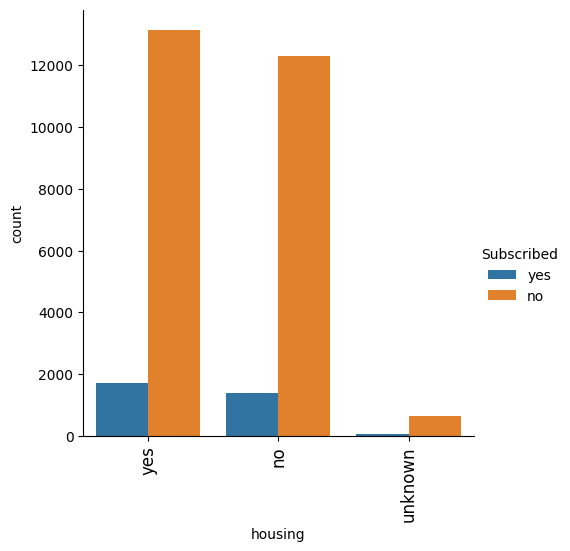

<Figure size 1200x600 with 0 Axes>

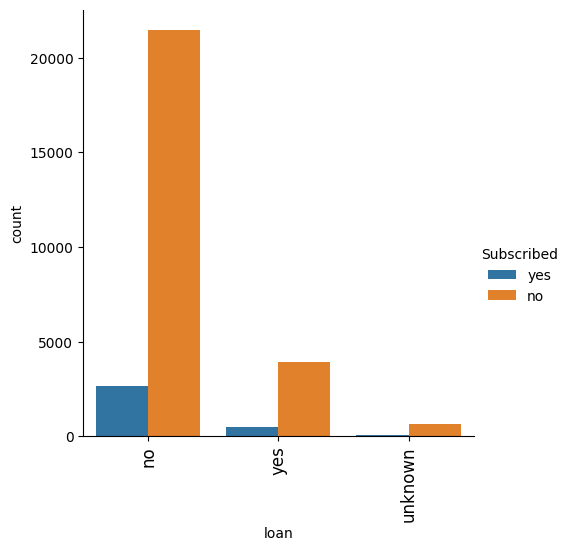

<Figure size 1200x600 with 0 Axes>

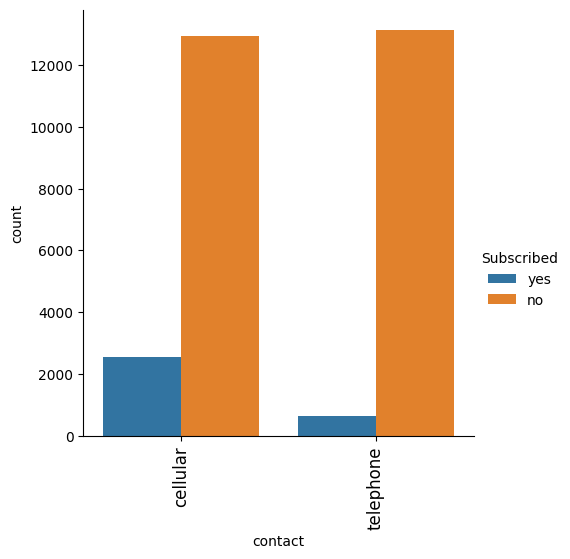

<Figure size 1200x600 with 0 Axes>

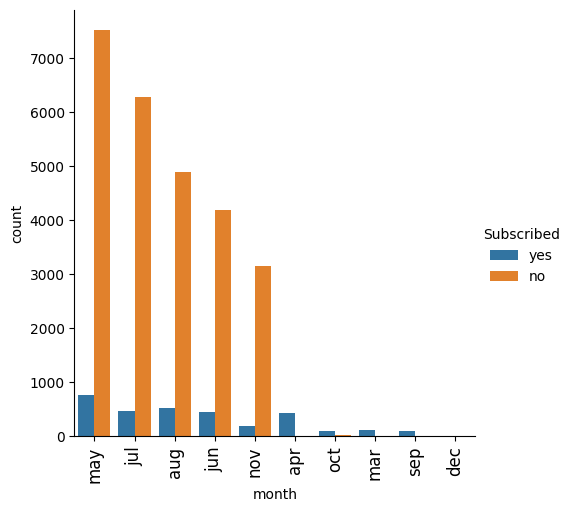

<Figure size 1200x600 with 0 Axes>

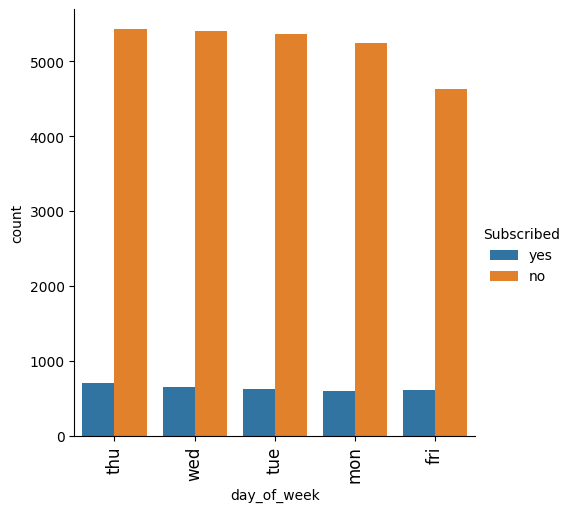

<Figure size 1200x600 with 0 Axes>

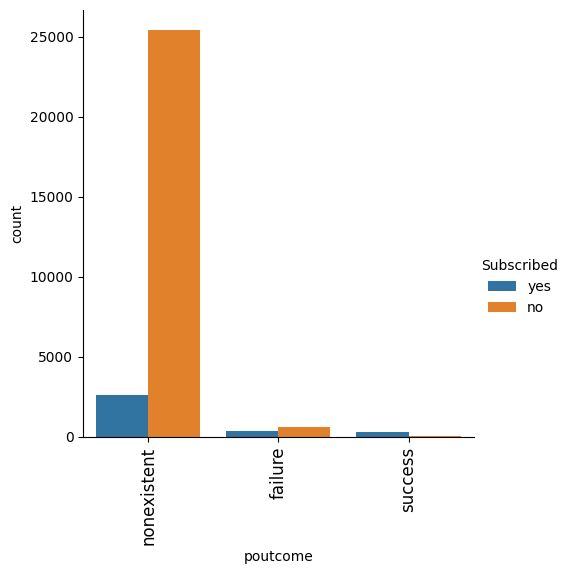

<Figure size 1200x600 with 0 Axes>

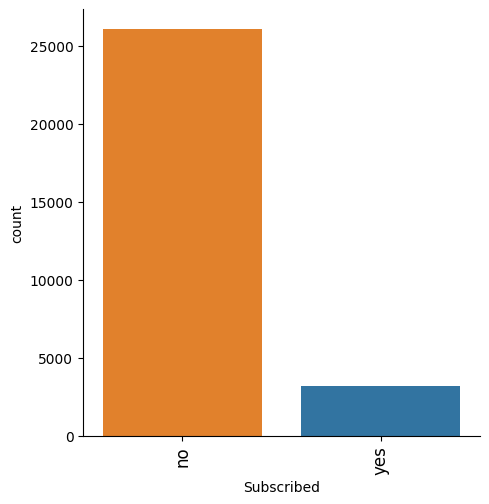

In [48]:
for i in cat_train.columns:
  plt.figure(figsize=(12,6))
  sb.catplot(data=cat_train, x=i, hue="Subscribed",kind='count',
             order=cat_train[i].value_counts().index)
  plt.xticks(rotation=90, fontsize = 12)
plt.show()


From the train set we can see the dataset contains more no. of observations related to target feature "no" rather than "yes". This is an imbalanced dataset and may lead to a bias. After building the model, there is a chance that the model may predict "yes" as "no" as the model is trained for more no. of observations of one particular class. So, we have to balance our dataset. In this case we will look at the test set and compare the results

### Test Set

We will create a function like the one above to divide the dataset into categorical and numerical features.

In [50]:
def eda_test(test):
  """
  Perfomr exploratory data analysis (EDA) on the train dataset.

  Args:
  - train (DataFrame): Train dataset

  Returns:
  - None
  """

  # Summary statisitcs
  print("Test Data Summary Statisitcs:")
  print(test.describe())
  print("\n")

  # Differentiate Categorical and Numerical features

  # Categorical features
  cat_test = test.select_dtypes(include=['object'])
  print("Categorical Features:")
  print(cat_test.head())
  print("\n")

  # Numerical features
  numericaltest_features = [feature for feature in test.columns if  test[feature].dtypes != 'object']
  num_test = test[numericaltest_features]
  print("Numerical Features:")
  print(num_test.head())
  print("\n")


  # Separate Discrete and Continous features
  discrete_feature = [feature for feature in numericaltest_features if len(train[feature].unique()) < 25]
  continous_feature = [feature for feature in numericaltest_features if feature not in discrete_feature]

  print("Discrete Features:")
  print(discrete_feature)
  print("\n")

  print("Continuous Features:")
  print(continous_feature)
  print("\n")

  # Lets brake down to numerical continous features
  test_data_cont = num_test[continous_feature]
  print("Continous features that are numerical:")
  print(test_data_cont.head())
  print("\n")

  return cat_test, num_test, discrete_feature, continous_feature, test_data_cont

cat_test, num_test, discrete_feature, continuous_feature, test_data_cont = eda_test(test)


Test Data Summary Statisitcs:
                age      duration      campaign         pdays   nr.employed
count  29260.000000  29260.000000  29260.000000  29260.000000  29260.000000
mean      40.125837    266.385748      2.738072    988.231408   5205.364296
std        9.523000    272.860476      3.085909    102.898976     36.303563
min       17.000000      0.000000      1.000000      0.000000   5017.500000
25%       32.000000    103.000000      1.000000    999.000000   5191.000000
50%       39.000000    179.000000      2.000000    999.000000   5228.100000
75%       47.000000    327.000000      3.000000    999.000000   5228.100000
max       88.000000   4918.000000     56.000000    999.000000   5228.100000


Categorical Features:
            job   marital            education housing loan    contact month  \
0   blue-collar  divorced             basic.4y     yes   no  telephone   may   
1  entrepreneur   married    university.degree     yes   no  telephone   may   
2    technician   marr

Same as train data, We have 10 categorical features which include:job,marital, education,housing,loan, contact, month,day, poutcome, and our target variable subscribed.

We have 5 Numerical variables which include: age, duration, campaign, pdays, nr.employed.

Out of the 5 Numerical variable pdays and nr.employed are discrete while age, duration, campaign are continous

### Visualizing continous features for Test set

#### Histogram

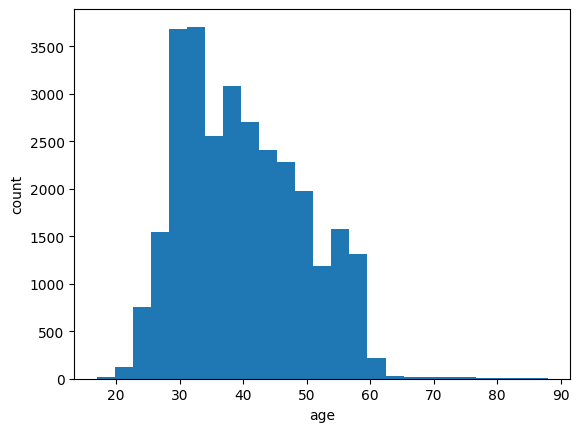

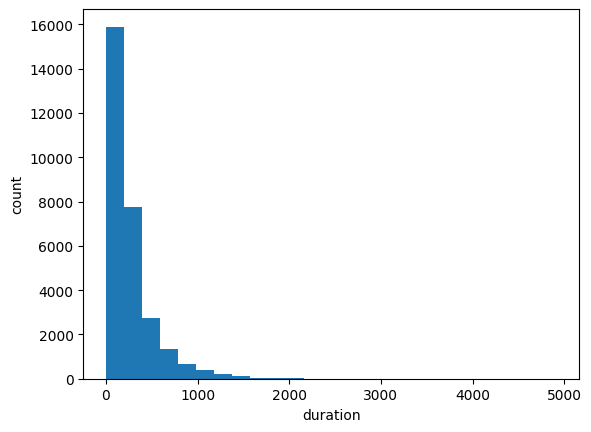

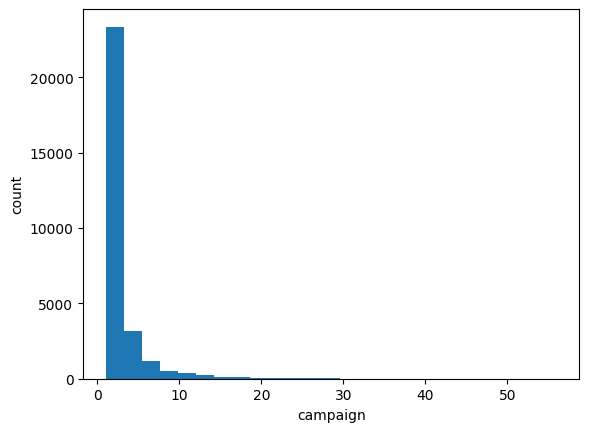

In [51]:
for feature in test_data_cont.columns:
  plt.figure()
  plt.hist(test_data_cont[feature], bins=25)
  plt.xlabel(feature)
  plt.ylabel("count")


#### Boxplot

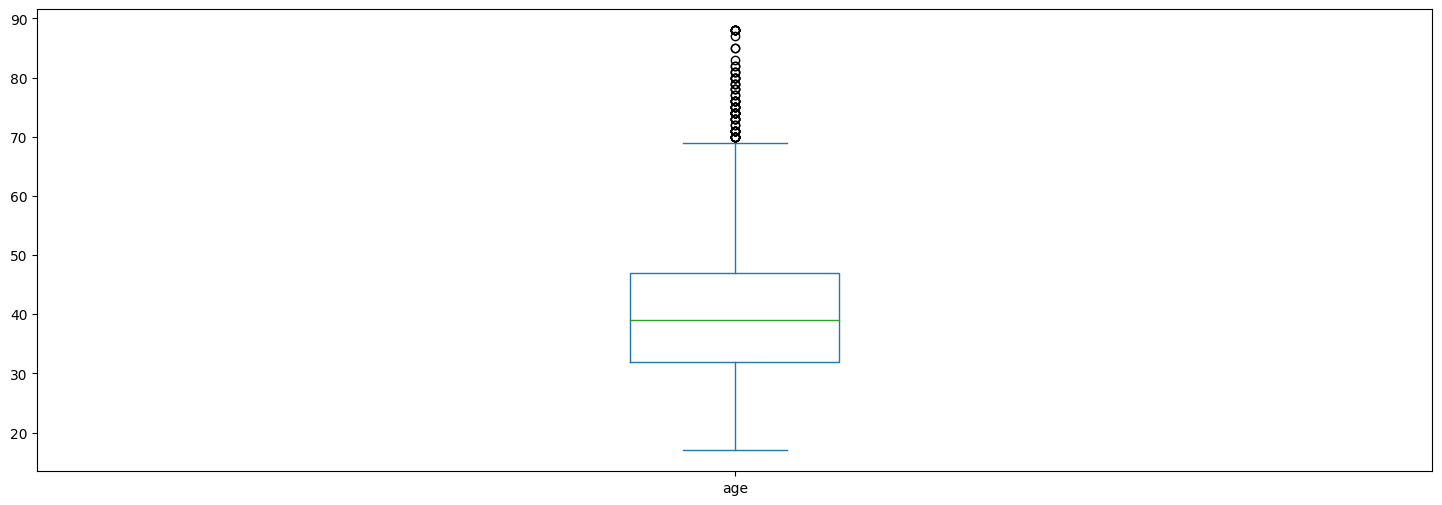

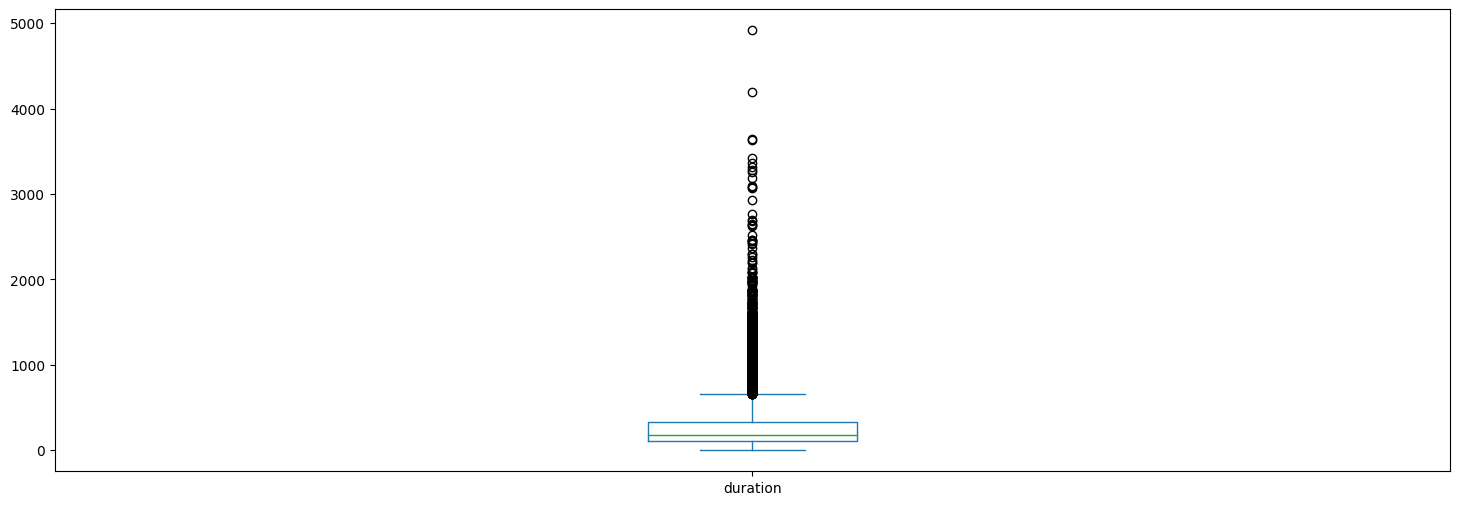

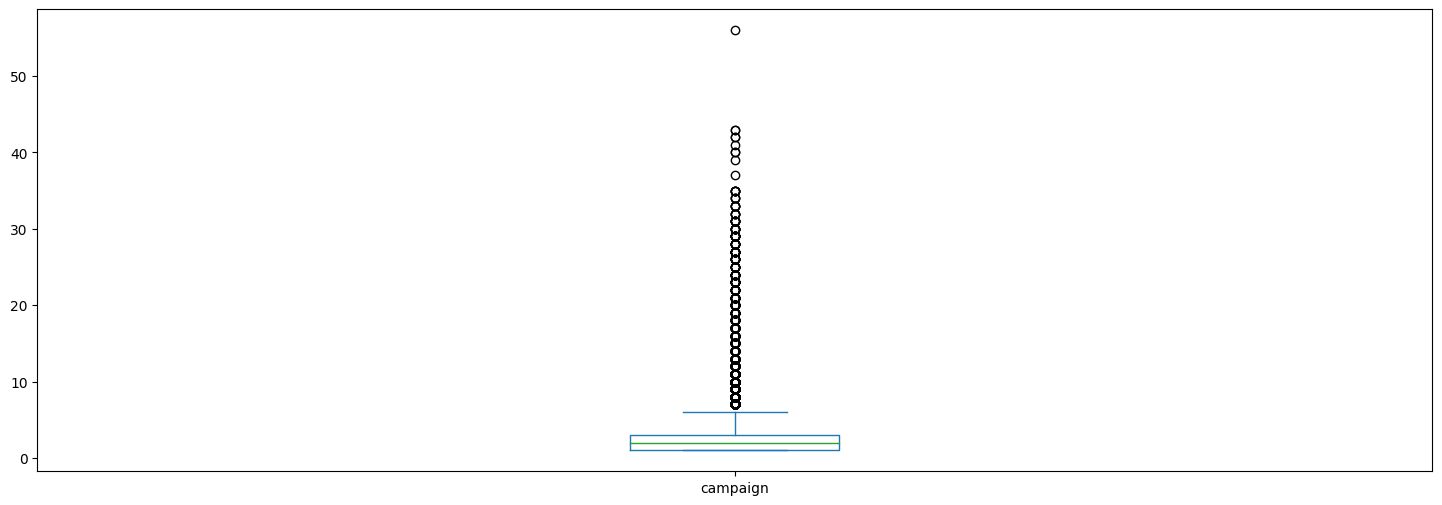

In [52]:
for feature in test_data_cont.columns:
    plt.figure(figsize=(18, 6))
    test_data_cont[feature].plot(kind='box')
    plt.show()


Correlation and Heat map

In [53]:
# Checking for Correlation between variables
test_data_cont.corr()

,age,duration,campaign
age,1.000000,-0.023437,0.011455
duration,-0.023437,1.000000,-0.074254
campaign,0.011455,-0.074254,1.000000


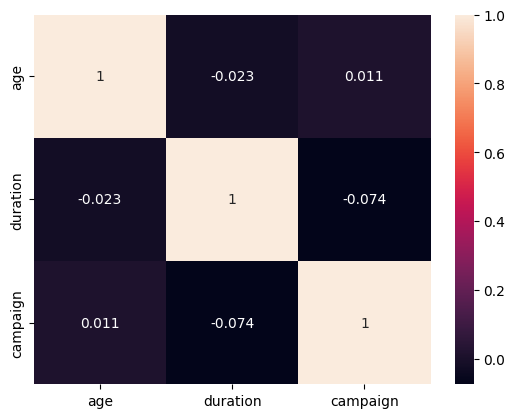

In [55]:
sns.heatmap(test_data_cont.corr(), annot=True)
plt.show()

### Visualizing categorical features

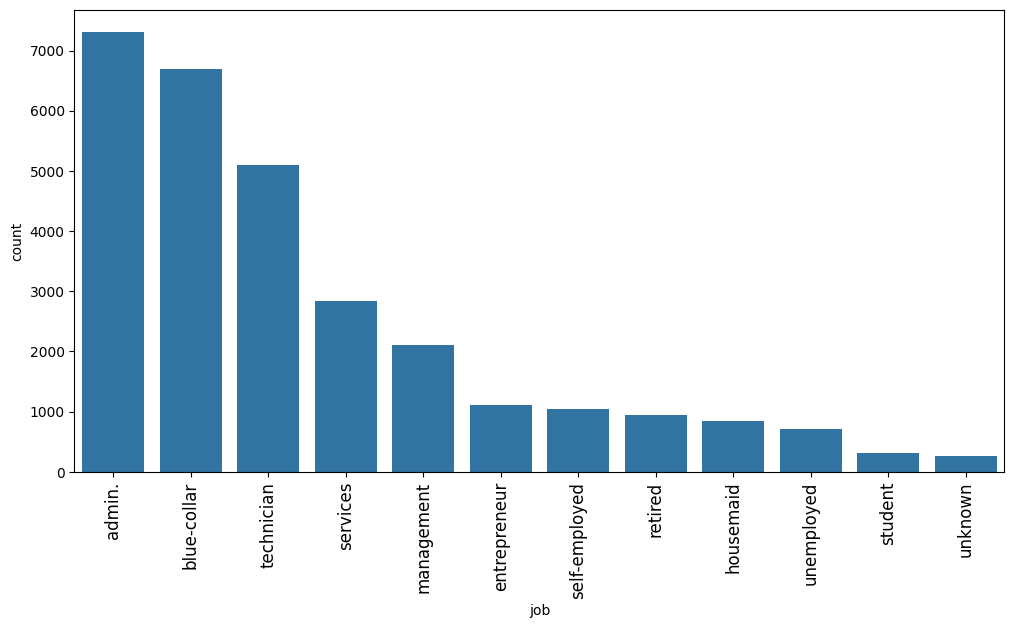

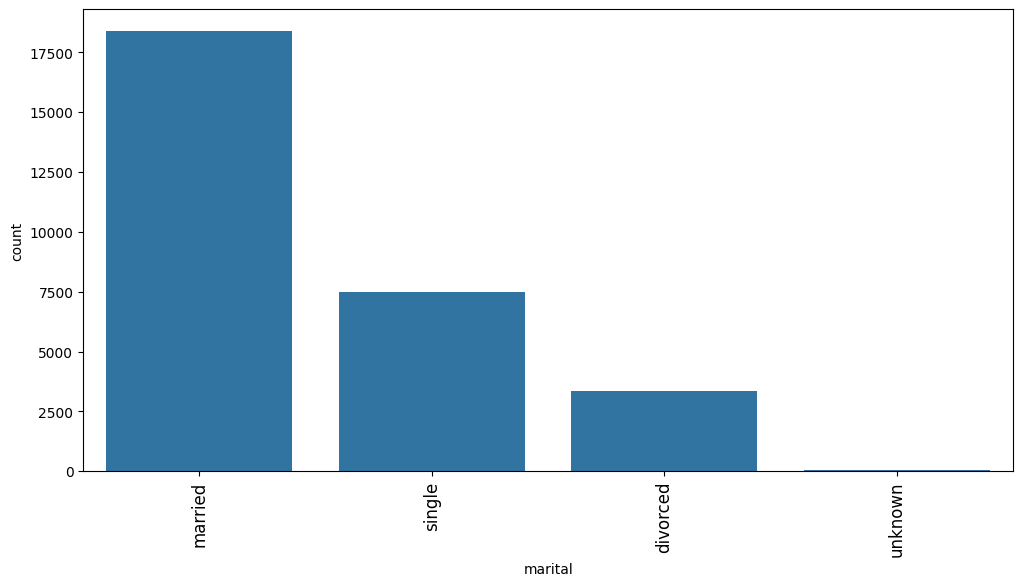

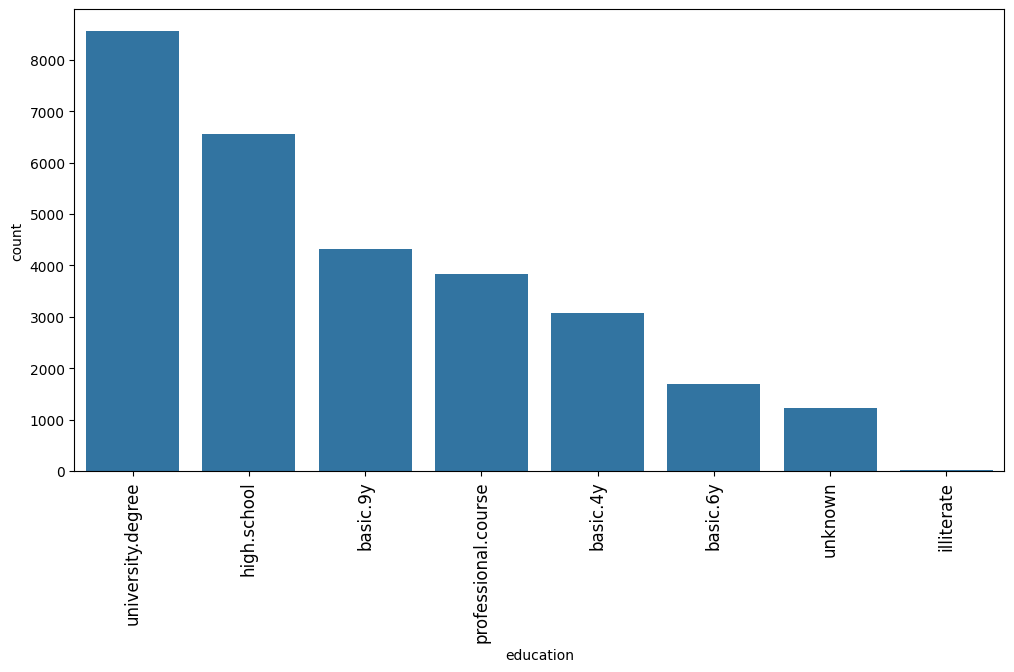

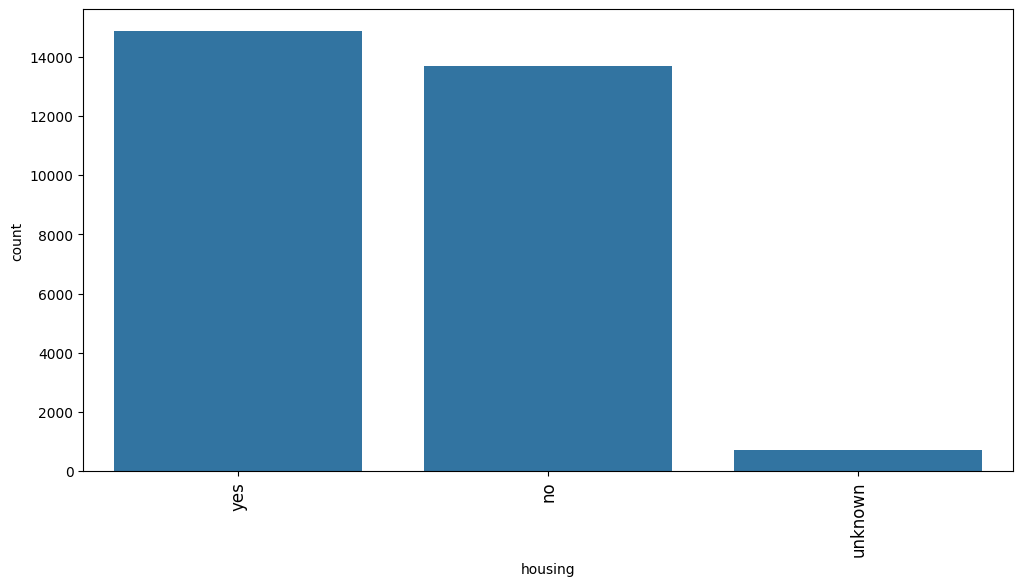

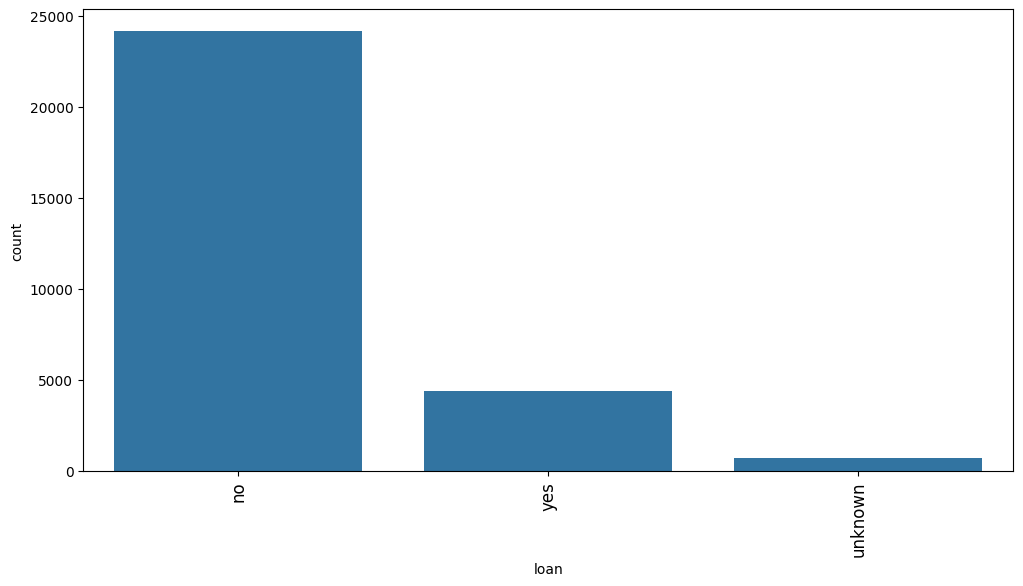

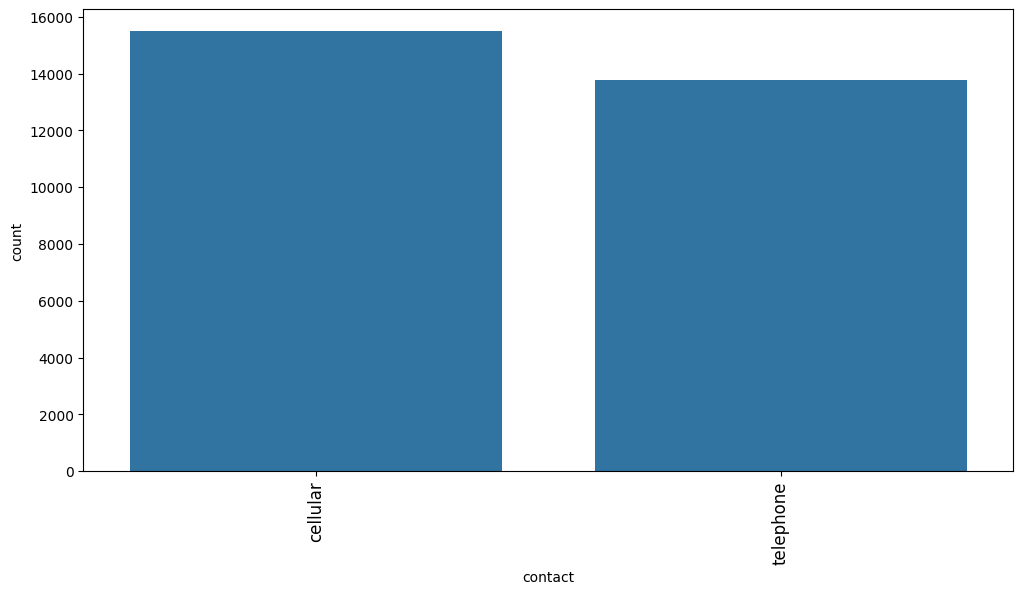

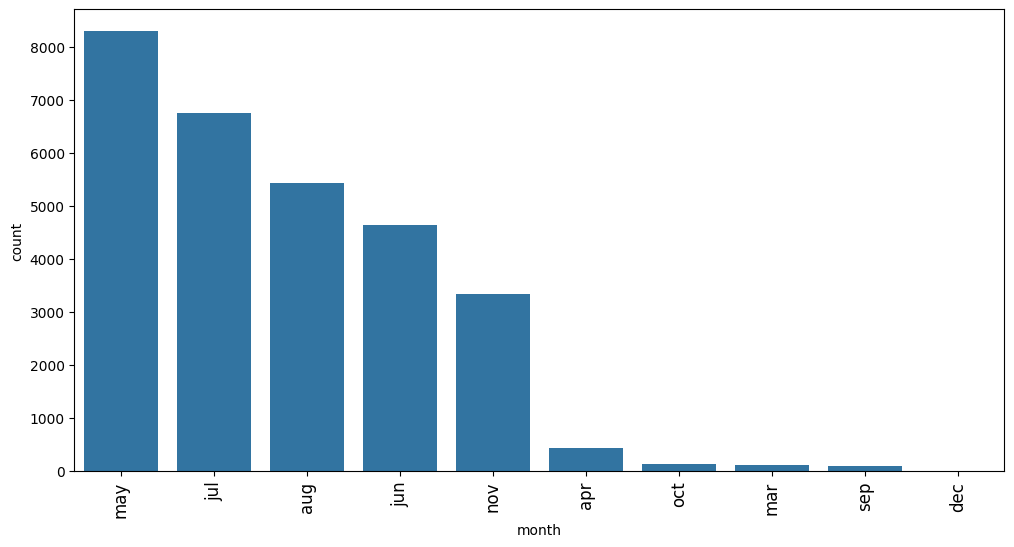

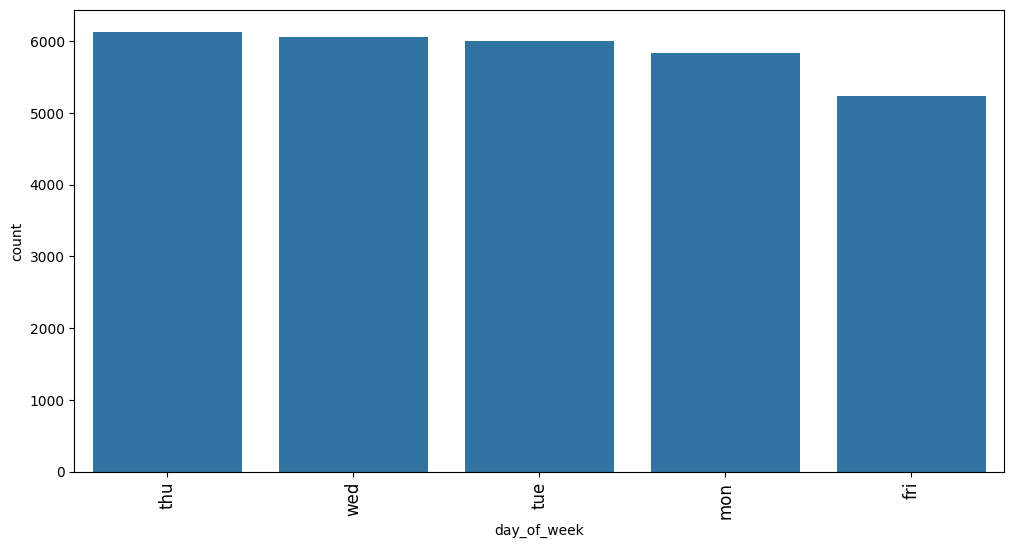

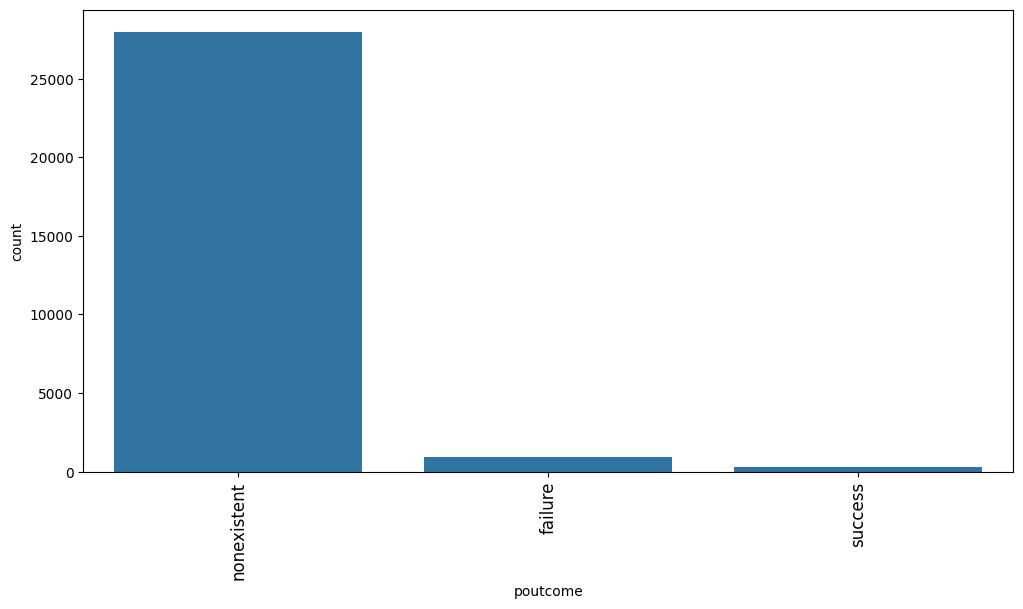

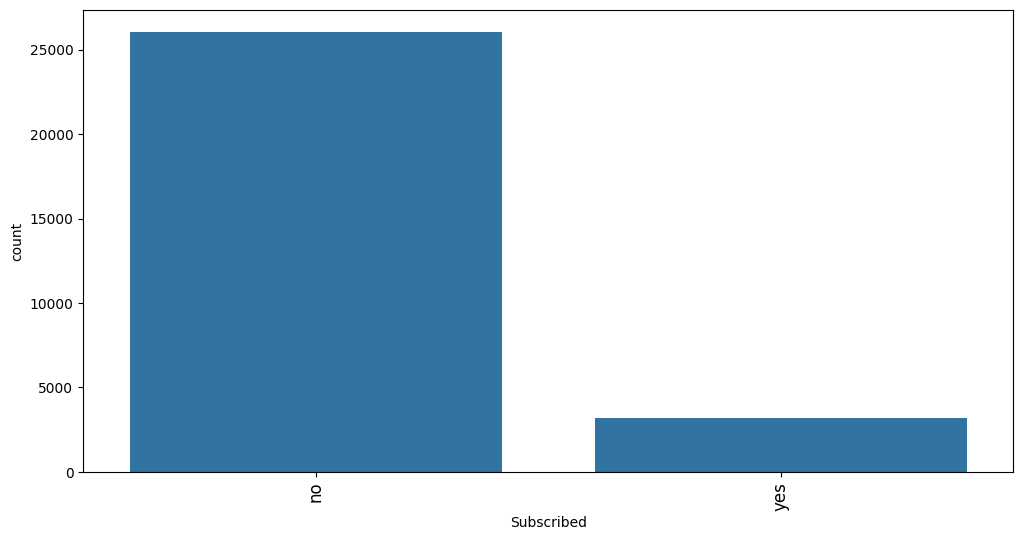

In [57]:
for i in cat_test.columns:
  plt.figure(figsize=(12,6))
  sns.countplot(x=i, data=cat_test,
                order=cat_test[i].value_counts().index)
  plt.xticks(rotation = 90, fontsize = 12)
plt.show()

<Figure size 1200x600 with 0 Axes>

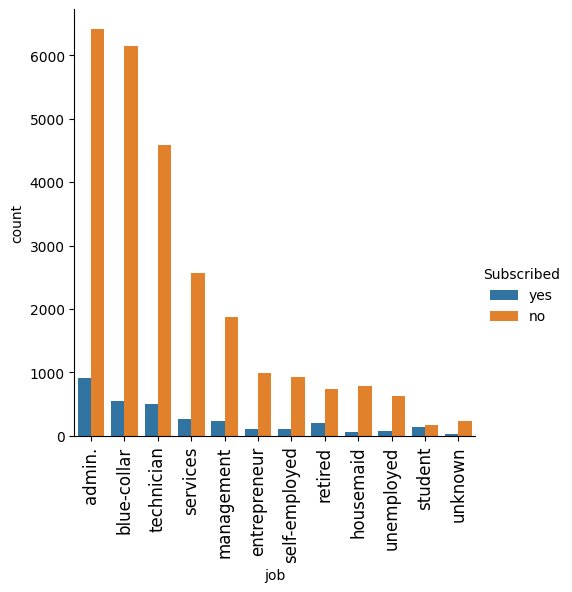

<Figure size 1200x600 with 0 Axes>

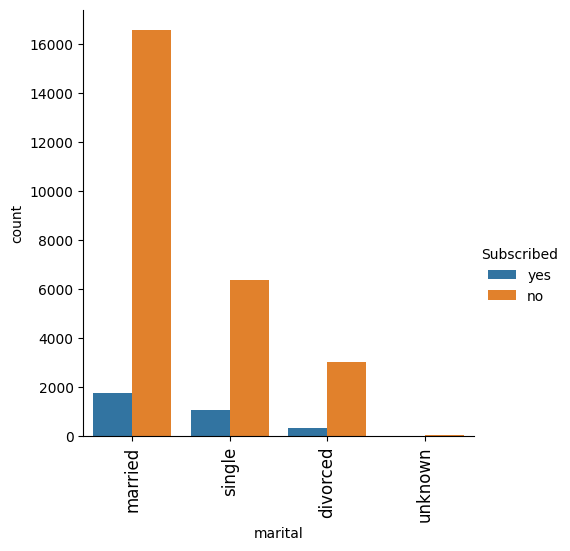

<Figure size 1200x600 with 0 Axes>

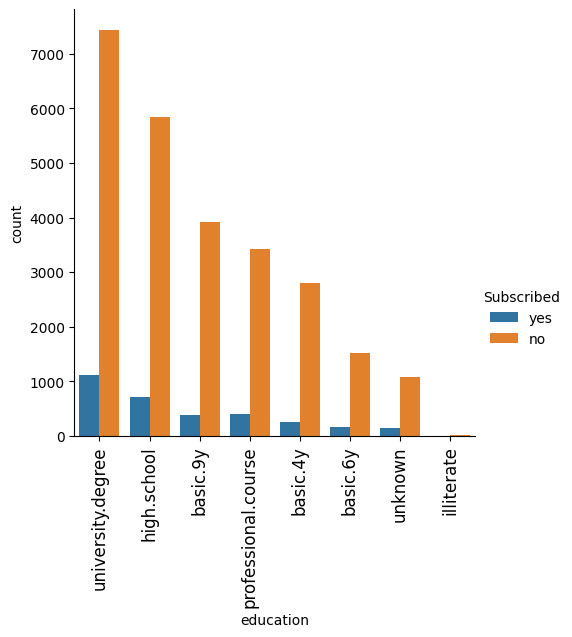

<Figure size 1200x600 with 0 Axes>

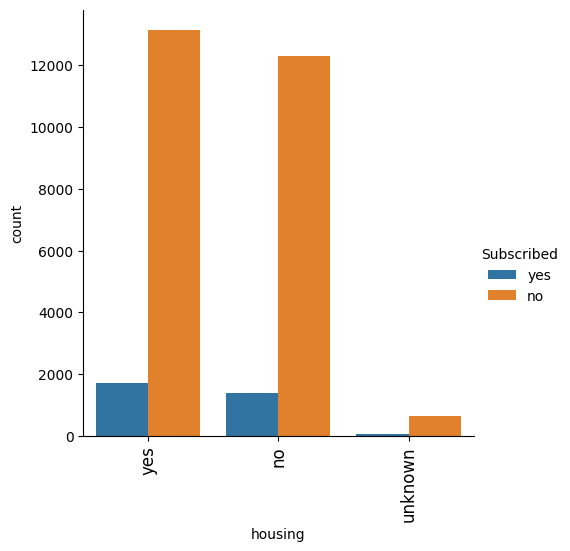

<Figure size 1200x600 with 0 Axes>

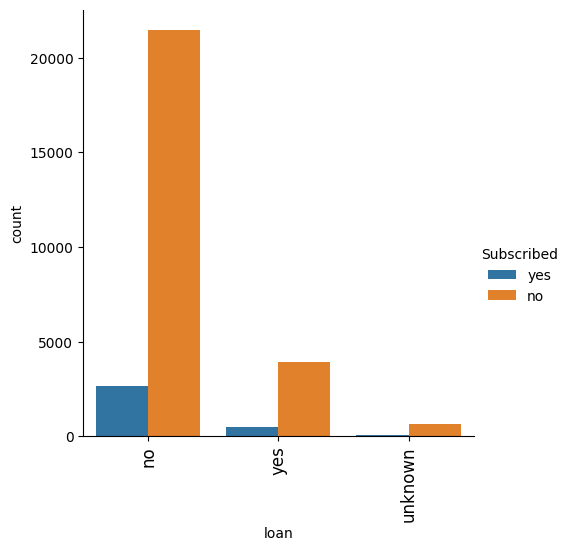

<Figure size 1200x600 with 0 Axes>

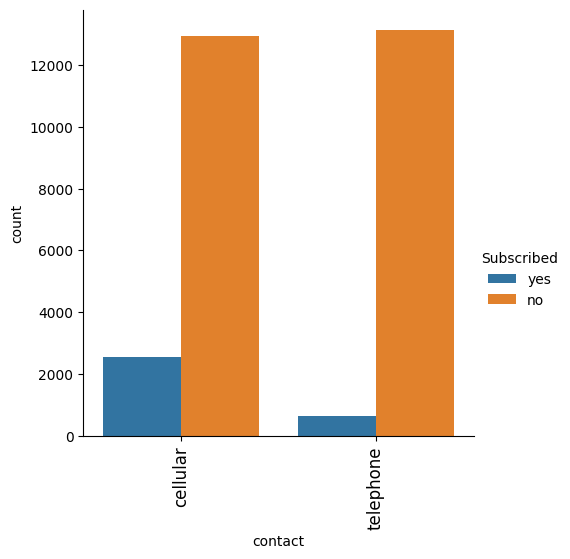

<Figure size 1200x600 with 0 Axes>

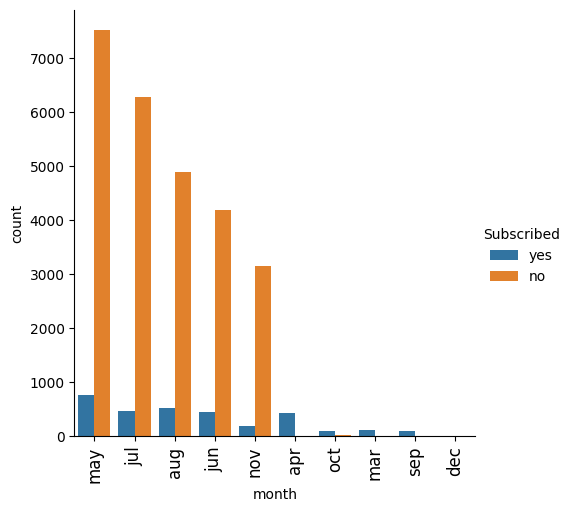

<Figure size 1200x600 with 0 Axes>

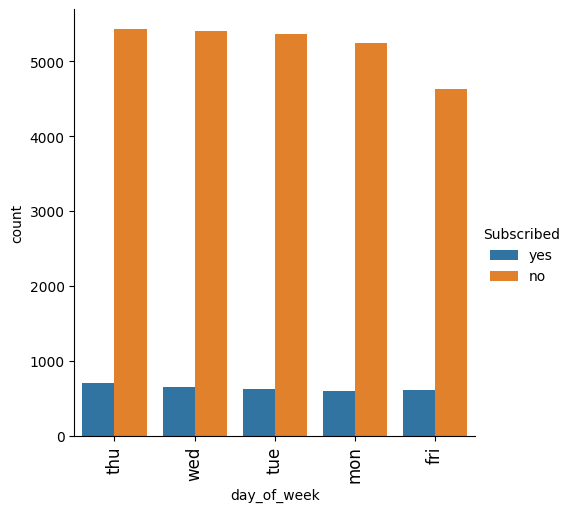

<Figure size 1200x600 with 0 Axes>

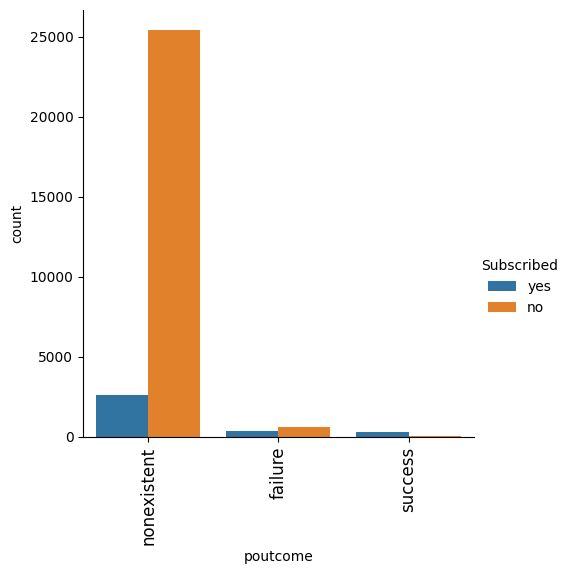

<Figure size 1200x600 with 0 Axes>

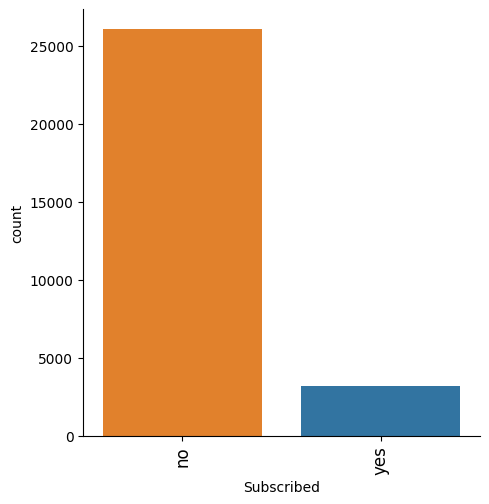

In [58]:
for i in cat_test.columns:
  plt.figure(figsize=(12,6))
  sb.catplot(data=cat_test, x=i, hue="Subscribed",kind='count',
             order=cat_test[i].value_counts().index)
  plt.xticks(rotation=90, fontsize = 12)
plt.show()


As seen from the previous visualizations, our data is imbalanced. We have also noted that both datasets have the same distribution and similar variables.

We will proceed and clean our datasets and make the datasets balanced

### Feature Engineering

There are values like 'unknown' in some of the features. These values have to be treated.

We will start with the train set

#### Train Set

In [59]:
cols = [col for col in train.columns]
# List to store column names with 'unknown' values
col_missing = []

# Iterate through each column in the DataFrame
for col in cols:
    # Check if 'unknown' is present in any value of the column
    if 'unknown' in train[col].values:
        # If 'unknown' is found, append the column name to col_missing list
        col_missing.append(col)

# Print the columns with 'unknown' values
print("Columns with Unknown Values -", col_missing)


Columns with Unknown Values - ['job', 'marital', 'education', 'housing', 'loan']


we have 5 columns that have the value unknown. We will replace it the value other

In [60]:
train[['job','marital','education','housing','loan']] = train[['job','marital','education','housing','loan']].replace(['unknown'],'other')


In [61]:
train.job.value_counts()

admin.           7310
blue-collar      6695
technician       5090
services         2832
management       2112
entrepreneur     1109
self-employed    1036
retired           945
housemaid         853
unemployed        705
student           313
other             260
Name: job, dtype: int64

#### Converting categorical variables into numerical using Custom Binary Encoding of variables

In [62]:
train['housing'] = np.where(train['housing'].str.contains("yes"), 1, 0)
train['loan'] = np.where(train['loan'].str.contains("yes"), 1, 0)
train['Subscribed'] = np.where(train['Subscribed'].str.contains("yes"), 1, 0)
train

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,1,0,telephone,may,mon,1575,1,999,nonexistent,5191.0,1
1,49,entrepreneur,married,university.degree,1,0,telephone,may,mon,1042,1,999,nonexistent,5191.0,1
2,49,technician,married,basic.9y,0,0,telephone,may,mon,1467,1,999,nonexistent,5191.0,1
3,41,technician,married,professional.course,1,0,telephone,may,mon,579,1,999,nonexistent,5191.0,1
4,45,blue-collar,married,basic.9y,1,0,telephone,may,mon,461,1,999,nonexistent,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29255,49,admin.,married,other,0,0,cellular,nov,fri,288,1,999,failure,5195.8,0
29256,34,management,single,university.degree,0,0,telephone,nov,fri,114,5,999,nonexistent,5195.8,0
29257,29,technician,single,professional.course,0,0,cellular,nov,fri,161,3,999,nonexistent,5195.8,0
29258,57,blue-collar,married,basic.9y,0,1,cellular,nov,fri,150,2,999,nonexistent,5195.8,0


In [63]:
train_categorical = train.select_dtypes(include=['object'])
train_categorical

,job,marital,education,contact,month,day_of_week,poutcome
0,blue-collar,divorced,basic.4y,telephone,may,mon,nonexistent
1,entrepreneur,married,university.degree,telephone,may,mon,nonexistent
2,technician,married,basic.9y,telephone,may,mon,nonexistent
3,technician,married,professional.course,telephone,may,mon,nonexistent
4,blue-collar,married,basic.9y,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...
29255,admin.,married,other,cellular,nov,fri,failure
29256,management,single,university.degree,telephone,nov,fri,nonexistent
29257,technician,single,professional.course,cellular,nov,fri,nonexistent
29258,blue-collar,married,basic.9y,cellular,nov,fri,nonexistent


#### Converting categorical variables into numerical using One-hot encoding

In [65]:
# Dummy variables of all categorical columns
dummies = pd.get_dummies(train_categorical)
dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29255,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
29256,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29257,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29258,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [66]:
# COncatenating two dataframes
train_df = pd.concat([train,dummies], axis=1)
train_df.drop(columns=train_categorical.columns, axis=1, inplace=True)
train_df

,age,housing,loan,duration,campaign,pdays,nr.employed,Subscribed,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1,0,1575,1,999,5191.0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,49,1,0,1042,1,999,5191.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,49,0,0,1467,1,999,5191.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,41,1,0,579,1,999,5191.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,45,1,0,461,1,999,5191.0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29255,49,0,0,288,1,999,5195.8,0,1,0,...,0,0,1,0,0,0,0,1,0,0
29256,34,0,0,114,5,999,5195.8,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29257,29,0,0,161,3,999,5195.8,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29258,57,0,1,150,2,999,5195.8,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [67]:
# Display all columns without truncating
pd.set_option("display.max.columns", None)
train_df

,age,housing,loan,duration,campaign,pdays,nr.employed,Subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_other,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_other,education_professional.course,education_university.degree,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1,0,1575,1,999,5191.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,49,1,0,1042,1,999,5191.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,49,0,0,1467,1,999,5191.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,41,1,0,579,1,999,5191.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,45,1,0,461,1,999,5191.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29255,49,0,0,288,1,999,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
29256,34,0,0,114,5,999,5195.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
29257,29,0,0,161,3,999,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
29258,57,0,1,150,2,999,5195.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29260 entries, 0 to 29259
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            29260 non-null  int64  
 1   housing                        29260 non-null  int64  
 2   loan                           29260 non-null  int64  
 3   duration                       29260 non-null  int64  
 4   campaign                       29260 non-null  int64  
 5   pdays                          29260 non-null  int64  
 6   nr.employed                    29260 non-null  float64
 7   Subscribed                     29260 non-null  int64  
 8   job_admin.                     29260 non-null  uint8  
 9   job_blue-collar                29260 non-null  uint8  
 10  job_entrepreneur               29260 non-null  uint8  
 11  job_housemaid                  29260 non-null  uint8  
 12  job_management                 29260 non-null 